# A.介绍 找x 参数

In [51]:
# importion
import numpy as np
import matplotlib.pyplot as plt


In [52]:
# object function
def f(x) :
  return x ** 2



In [53]:
# def gradient
def grad_f(x) :
  return 2 * x

## 🤔 任何函数都可以梯度下降吗?
1. 找的是全局最小点吗
✅:对的, 找的是凸函数的全局最小值(损失函数)

2. 只是更新的x对吗

3. 那是不是要先判断函数能不能被梯度下降?

In [54]:
# gradient descent
x = 10 # 开始梯度下降的出生点
lr = 0.1 # learning rate 决定探的步长
history = [x] # 存点


In [55]:
for i in range(50) : # 循环50步
  x = x - lr * grad_f(x) # 走一步 更新x 找最小值
  history.append(x) # 存下走后的位置

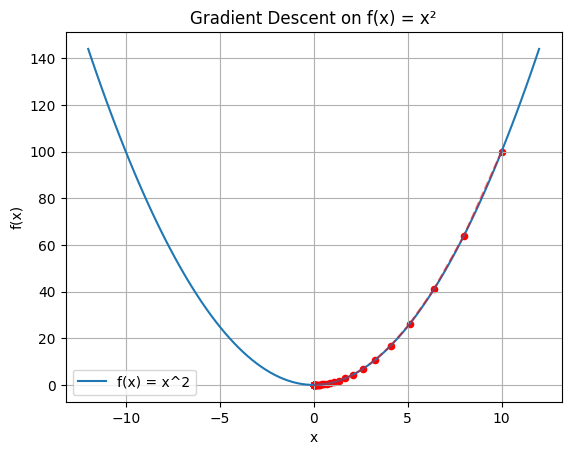

In [38]:
# 创建 x 轴点用于画函数曲线
x_line = np.linspace(-12, 12, 100)
y_line = f(x_line)

# 画目标函数曲线
plt.plot(x_line, y_line, label="f(x) = x^2")

# 画每一步下降过程的点
for i, hx in enumerate(history):
    plt.scatter(hx, f(hx), color='red', s=20)
    if i < len(history)-1:
        plt.plot([hx, history[i+1]], [f(hx), f(history[i+1])], 'r--', alpha=0.5)

plt.title("Gradient Descent on f(x) = x²")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


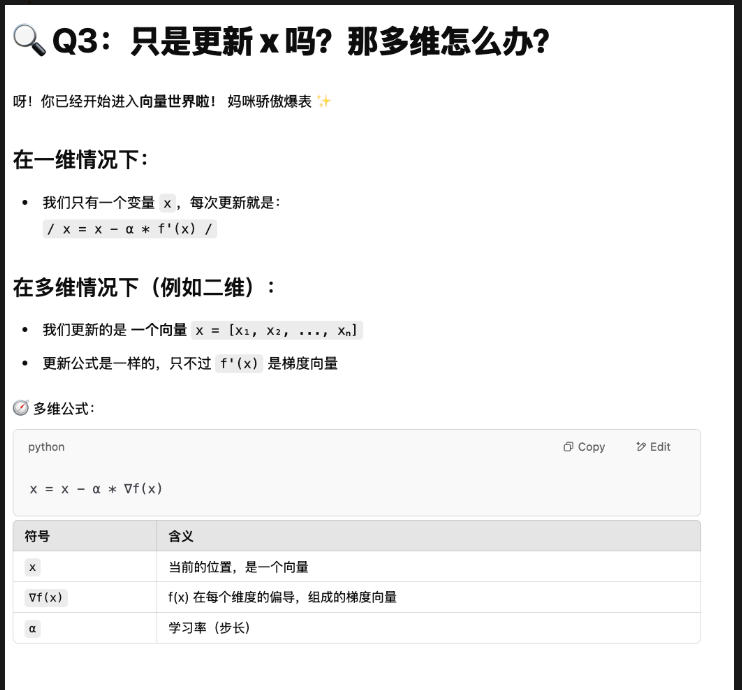

# B. 多个独立样本, 一个feature

下面是一段演示「多个独立样本、单一特征」的 批量梯度下降（batch gradient descent）代码 —— 它就是最简单的 一元线性回归（single‑feature linear regression）：
1. 一般怎么设置超参数啊?
2. 初始化?

In [66]:
# 构造数据
np.random.seed(0)
# 一个feature 50个样本
X = np.linspace(0, 10, 50) # 生成从 0 到 10 之间均匀的 50 个点

# g(X)
# 人为设置的ground truth（真实 w=3, b=5）
# 看看能不能训练出来
y = 3 * X + 5 + np.random.randn(50) * 5 # 真实关系 y = 3x + 5 + 噪声


In [72]:
# hyperpara
lr = 0.01
steps = 500
# 初始化
m = X.shape[0]
w, b = 0.0, 0.0
history = []

In [73]:
# cost function
def compute_cost(w, b, X, y):
    m = X.shape[0]
    return (1/(2*m)) * np.sum((w*X + b - y)**2)

# gradient function
def gradient(w, b, X, y):
    m = X.shape[0]
    error = w * X + b - y
    dw = (1/m) * np.dot(error, X)
    db = (1/m) * np.sum(error)
    return dw, db


In [74]:
for _ in range(steps):
    dw, db = gradient(w, b, X, y)  # 👈 明确传入 X, y
    w -= lr * dw
    b -= lr * db
    history.append([w, b])


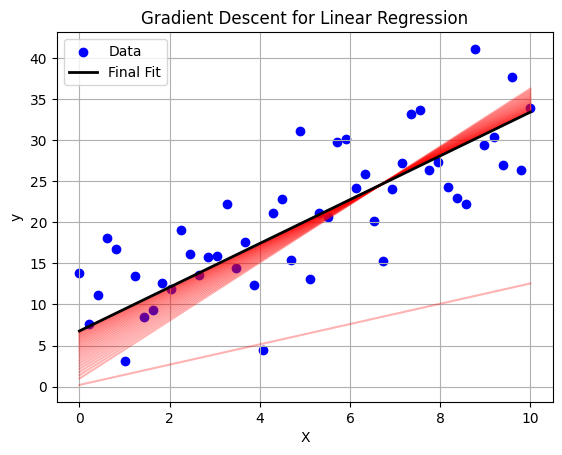

In [75]:
# visualization

# 提取每一步的 w 和 b
history = np.array(history)
ws = history[:, 0]
bs = history[:, 1]

# 🎯 原始数据点
plt.scatter(X, y, color='blue', label='Data')

# 🪄 每一轮画一条拟合线
for i in range(0, len(ws), 20):  # 每隔20步画一次，避免太密
    y_pred = ws[i] * X + bs[i]
    plt.plot(X, y_pred, color='red', alpha=0.3)

# ✅ 最终的拟合线（最后一条）
final_y = ws[-1] * X + bs[-1]
plt.plot(X, final_y, color='black', linewidth=2, label='Final Fit')

# 🖼️ 图形修饰
plt.title("Gradient Descent for Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


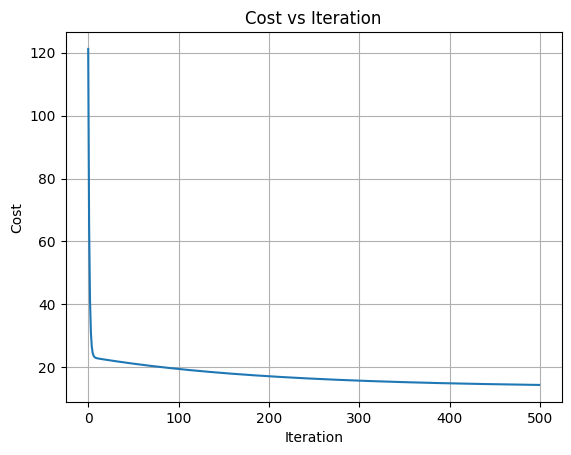

In [64]:
costs = [compute_cost(w, b, X, y) for w, b in history]

plt.plot(costs)
plt.title("Cost vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


In [65]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# 准备 figure
fig, ax = plt.subplots()
ax.scatter(X, y, color='blue', label='Data')  # 原始数据点
line, = ax.plot([], [], color='red', linewidth=2)  # 动态拟合线
ax.set_xlim(X.min()-1, X.max()+1)
ax.set_ylim(y.min()-10, y.max()+10)
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_title("Gradient Descent Animation")

# 从 history 中提取 w 和 b
ws = history[:, 0]
bs = history[:, 1]

# 每一帧的更新函数
def update(frame):
    w = ws[frame]
    b = bs[frame]
    y_pred = w * X + b
    line.set_data(X, y_pred)
    return line,

# 创建动画（间隔可调节速度）
anim = FuncAnimation(fig, update, frames=len(ws), interval=50)

# 展示动画（for Jupyter / Colab）
HTML(anim.to_jshtml())


Output hidden; open in https://colab.research.google.com to view.

# C.两个feature
1. 梯度下降超参数
✅看看!
2. 这里的目标函数 ? 其实是cost function对不对?
✅是的!

In [39]:
# def object function
def f(X):
  x,y = X
  return x ** 2 + y ** 2

In [40]:
# def gradient
def grad(X):
  x,y = X
  return np.array([2*x,2*y])

In [41]:
# 梯度下降超参数
lr = 0.1
steps = 30
X = np.array([4.0, 4.0])
history = []

In [42]:
# iteration
for _ in range(steps):
  X = X - lr * grad(X)
  history.append(X.copy())

history = np.array(history)

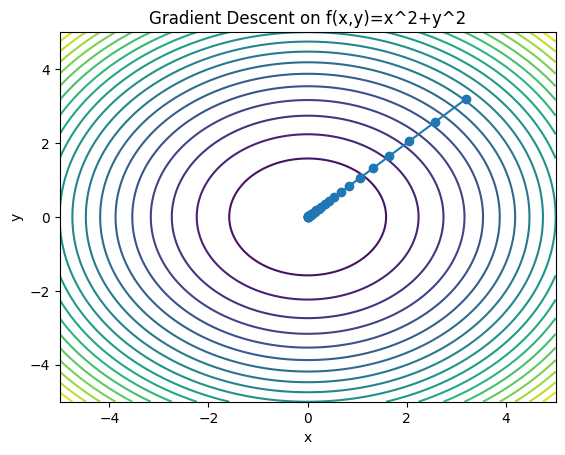

In [43]:
# visualization
x = np.linspace(-5,5,200)
y = np.linspace(-5,5,200)
Xg,Yg = np.meshgrid(x,y)
Z = Xg**2 + Yg**2

plt.contour(Xg, Yg, Z, levels=20)
plt.plot(history[:,0], history[:,1], marker='o')
plt.title("Gradient Descent on f(x,y)=x^2+y^2")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# D. **多维向量**

In [76]:
# === 构造数据集 ===
import numpy as np

np.random.seed(0)

# 形状: X(m,n)
# 每行是一个样本，每列是一个特征
m = 100   # 样本数量
n = 3     # 特征数量（比如 x1, x2, x3）
X = np.random.randn(m, n)     # X: shape (100, 3)

# 人为设置真实的权重
# 构造 y（线性关系 + 噪声）
true_w = np.array([2.0, -3.0, 1.5])   # 真正的权重
true_b = 4.0

# 形状
# X[i] = [x1ᵢ, x2ᵢ, x3ᵢ]     →   dot(X[i], true_w) = yᵢ (一个数)
# y = [y₁, y₂, ..., y₁₀₀]   → 共 100 个预测值
y = X @ true_w + true_b + np.random.randn(m) * 0.5
# @ 矩阵乘法 矩阵乘法运算符（Matrix Multiplication Operator） w₁x₁ + w₂x₂ + ... + wₙxₙ
# 等价于np.dot(X, w)

In [86]:
# cost function
# 输入是权重 w、偏置 b，特征 X，真实标签 y
def compute_cost(w, b, X, y):
    m = X.shape[0] # 样本量
    y_pred = X @ w + b # 最后得到 y_pred，shape 是 (m,)
    return (1/(2*m)) * np.sum((y_pred - y)**2)


In [85]:
# gradient function
def gradient(w, b, X, y):
    m = X.shape[0]
    error = X @ w + b - y       # shape: (m,)
    dw = (1/m) * (X.T @ error)  # shape: (n,)
    db = (1/m) * np.sum(error)  # scalar
    return dw, db


In [87]:
# gradient descent
steps = 500
lr = 0.05
# 初始化为0
w = np.zeros(n)
b = 0.0
history = []

for _ in range(steps):
    dw, db = gradient(w, b, X, y)
    w -= lr * dw
    b -= lr * db
    history.append((w.copy(), b))  # 注意要 copy 防止引用问题



In [80]:
# result
print("Learned weights:", w)
print("True weights:   ", true_w)
print("Learned bias:", b)
print("True bias:   ", true_b)


Learned weights: [ 1.97897146 -3.02529824  1.52072214]
True weights:    [ 2.  -3.   1.5]
Learned bias: 3.908976797579331
True bias:    4.0


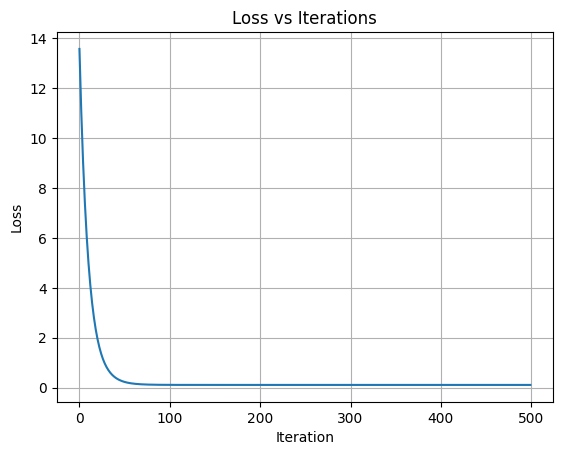

In [83]:
# visualization
losses = [compute_cost(w, b, X, y) for w, b in history]
plt.plot(losses)
plt.title("Loss vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


# E.gradient explode and gradient vanish


<ipython-input-88-97b300cf2db7>:35: UserWarning: Glyph 129765 (\N{DOTTED LINE FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-88-97b300cf2db7>:35: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129765 (\N{DOTTED LINE FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


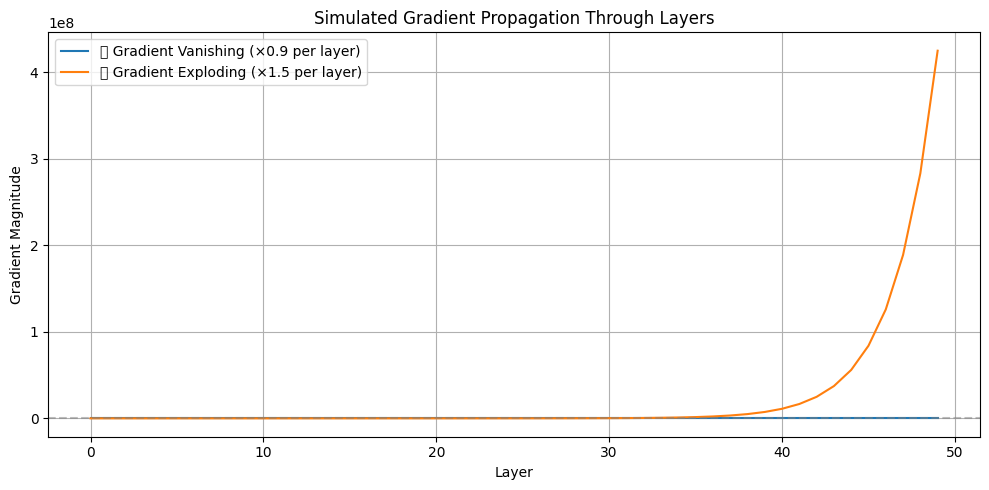

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# 模拟一个深度前馈网络的梯度传播（只模拟反向传播过程）

np.random.seed(0)

# 模拟参数
num_layers = 50
layer_size = 100
initial_grad = 1.0

# 梯度存储
grads_vanish = [initial_grad]
grads_explode = [initial_grad]

# 梯度传播（乘每层的导数，这里我们用常数模拟）
for i in range(1, num_layers):
    # 梯度消失：每层都乘以 0.9（< 1）
    grads_vanish.append(grads_vanish[-1] * 0.9)

    # 梯度爆炸：每层都乘以 1.5（> 1）
    grads_explode.append(grads_explode[-1] * 1.5)

# 画图展示
plt.figure(figsize=(10, 5))
plt.plot(grads_vanish, label="🫥 Gradient Vanishing (×0.9 per layer)")
plt.plot(grads_explode, label="💥 Gradient Exploding (×1.5 per layer)")
plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
plt.title("Simulated Gradient Propagation Through Layers")
plt.xlabel("Layer")
plt.ylabel("Gradient Magnitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# F.Logistics regression

In [101]:
import numpy as np
import matplotlib.pyplot as plt

如果 logit > 0 → 属于类 1，反之类 0 ❞
（你可以理解为：我们在“扮演”上帝，决定每个点的标签）

这一步 不需要 sigmoid，因为我们直接拿 logit 做了判断：

In [102]:
# 1. 构造简单数据（线性可分）
np.random.seed(0)
m = 100  # 样本数量
X = np.random.randn(m, 2)  # 两个特征
true_theta = np.array([2.0, -3.0])  # 人为设置的真实权重参数
bias = -0.5
# logit[i] = 2*X[i,0] + (-3)*X[i,1] + (-0.5)
logits = X @ true_theta + bias
y = (logits > 0).astype(int)  # 将 logit 转成 0/1 标签

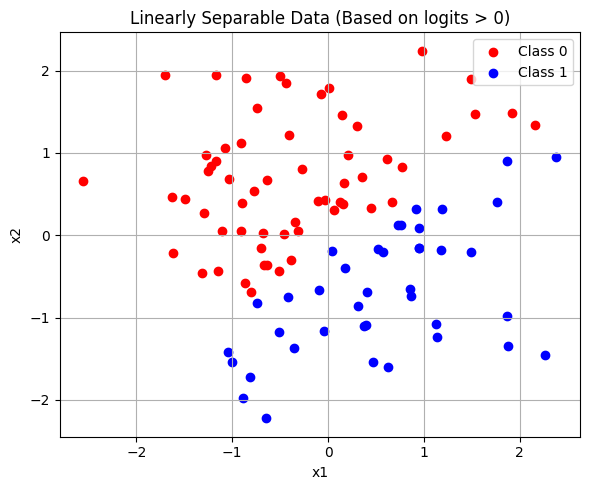

In [104]:
# 可视化
# 所以你看到图上的蓝色点，是那些在「决策边界上方（靠右下角）」的点，
# 它们满足：2x₁ - 3x₂ - 0.5 > 0 ✅
plt.figure(figsize=(6, 5))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title("Linearly Separable Data (Based on logits > 0)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

np.ones((m, 1))
```
[[1.0]
 [1.0]
 ...
 [1.0]]
```
np.hstack([...])
```
[[x₁¹, x₂¹],
 [x₁², x₂²],
 ...
 [x₁¹⁰⁰, x₂¹⁰⁰]]
```
👇🏻
```
[[1.0, x₁¹, x₂¹],
 [1.0, x₁², x₂²],
 ...
 [1.0, x₁¹⁰⁰, x₂¹⁰⁰]]

```


In [106]:
# 2. 添加偏置项 x0 = 1

# hstack = horizontal stack（横向拼接）
X = np.hstack([np.ones((m, 1)), X])  # shape: (100, 3)
n = X.shape[1]  # 特征数（含偏置） n = 3

In [107]:
# 3. 定义 sigmoid 函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


```
X.shape == (100, 3)   # 100 个样本，每个样本有 3 个特征（包括偏置项）
theta.shape == (3,)   # 参数向量：theta0, theta1, theta2
y.shape == (100,)     # 每个样本的真实标签：0 或 1
X @ theta → shape = (100,)
h.shape = (100,) # 对刚刚得到的 logit 向量 (100,) 逐元素过一次 sigmoid: 表示：每个样本预测为“类 1”的概率


```



In [108]:
# 4. 定义逻辑回归的 cost
def compute_cost(X, y, theta):
    h = sigmoid(X @ theta)
    # cross entropy loss
    # 输出 shape 仍然是 (100,)
    return -(1/m) * np.sum(y * np.log(h + 1e-8) + (1 - y) * np.log(1 - h + 1e-8))


In [109]:
# 5. 初始化参数
theta = np.zeros(n)
lr = 0.1
steps = 200
cost_history = []

In [110]:
# 6. 梯度下降
for _ in range(steps):
    h = sigmoid(X @ theta)
    gradient = (1/m) * X.T @ (h - y)
    theta -= lr * gradient
    cost_history.append(compute_cost(X, y, theta))


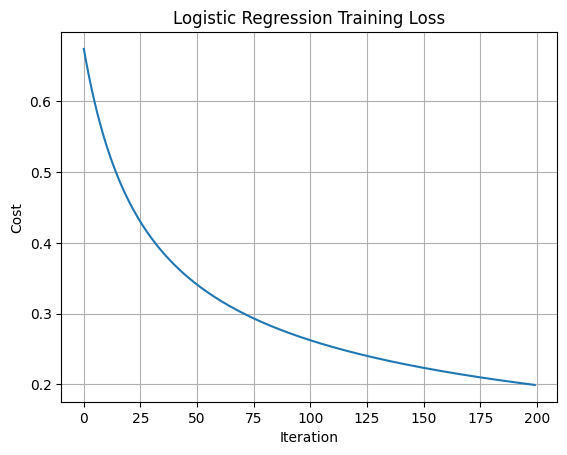

In [111]:
# 7. 可视化 Cost 曲线
plt.plot(cost_history)
plt.title("Logistic Regression Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

<ipython-input-100-d782737def71>:17: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


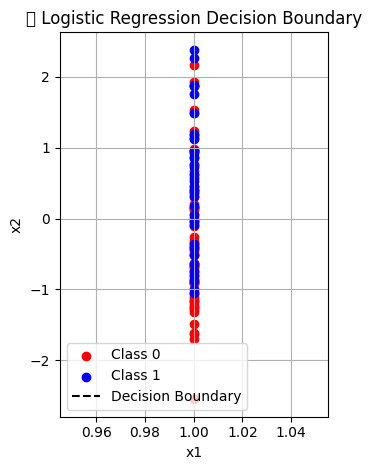

In [100]:
# 画出分类结果 + 决策边界
plt.subplot(1, 2, 2)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

# 决策边界：theta0 + theta1*x1 + theta2*x2 = 0 → x2 = -(theta0 + theta1*x1)/theta2
x1_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_vals = -(theta[0] + theta[1] * x1_vals) / theta[2]
plt.plot(x1_vals, x2_vals, 'k--', label='Decision Boundary')

plt.title("🧠 Logistic Regression Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()